In [1]:
import numpy as np
import copy
import scipy.io

In [2]:
mat = scipy.io.loadmat('/Users/nikitakocherin/Downloads/BlackBoxData.mat')
x = mat['x'][0]
y = mat['y'][0]
x = (x / np.linalg.norm(x))
y = (y / np.linalg.norm(y))

In [3]:
def generate_first_mon(bias, x):
        if bias == 0:
                return x
        base = np.zeros(len(x), dtype='complex')
        if bias < 0:
            for i in range(-bias, len(x)):
                base[i] = x[i + bias]
        elif bias > 0:
            for i in range(len(x) - bias):
                base[i] = x[i + bias]
        return base

In [ ]:
#Функция для генерации словаря мономов, из которых потом будет состоять каждый элемент настоящего словаря
# I -- максимальный модуль сдвига(bias)
# |d|
#нужно брать модуль при генерации
def generate_monom_dict(I, D, x):
    def generate_mon(bias, degree, x):
        if bias == 0:
            return np.power(np.absolute(x), degree)
        base = np.zeros(len(x), dtype='complex')
        if bias < 0:
            for i in range(-bias, len(x)):
                base[i] = x[i + bias]
        elif bias > 0:
            for i in range(len(x) - bias):
                base[i] = x[i + bias]
        return np.power(np.absolute(base), degree)
    result = []
    for i in range(-I, I + 1):
        for j in range(D + 1):
            result.append(generate_mon(i, j, x))
    return result

In [5]:
def multiplicate(count, monom_dict):
    if count == 1:
        for i in monom_dict:
            yield i
    elif count == 2:
        for i in monom_dict:
            for j in monom_dict:
                yield i * j
    elif count == 3:
        for i in monom_dict:
            for j in monom_dict:
                for k in monom_dict:
                    yield i * j * k

In [44]:
def generate_real_dict_generator_subset(I, D, M, x, bias):
    monom_dict = generate_monom_dict(I, D, x)
    first_mon = generate_first_mon(bias, x)
    to_mult = multiplicate(M, monom_dict)
    for j in to_mult:
        k = first_mon * j
        k = k / np.linalg.norm(k)
        yield k

In [45]:
#y -- приближаем с помощью x
#u -- остаток, изначальный остаток -- y
#
def approximate_without_saving(x, y, I, D, M, flag=True):
    u_n = y
    iter = 0
    v_arr = []
    vector_norm = []
    norm_u_n_prev = 0
    u_n_prev = copy.deepcopy(u_n)
    while(np.linalg.norm(u_n) > 0.01 and iter < 1000):
        vector_norm.append(np.linalg.norm(u_n))
        if abs(np.linalg.norm(u_n) - norm_u_n_prev) < 0.0000001:
            break
        norm_u_n_prev = np.linalg.norm(u_n)
        for j in range(-I, I + 1):
            v_n1 = None
            val = 0
            my_dict = generate_real_dict_generator_subset(I, D, M, x, j)
            for i in my_dict:
                s = np.absolute(np.vdot(u_n, i))
                nor = abs(s)
                if nor > val:
                    v_n1 = i
                    val = nor
            h_n1_wave = copy.deepcopy(v_n1)
            if flag:
                for i in v_arr:
                    #print("iter", iter)
                    #print(np.vdot(v_n1, i), np.vdot(i, v_n1))
                    h_n1_wave = h_n1_wave - np.vdot(i, v_n1) * i
            h_n1 = h_n1_wave / np.linalg.norm(h_n1_wave)
            v_arr.append(h_n1)
            u_n = u_n - np.vdot(h_n1, u_n) * h_n1 #поменял
        iter += 1
        if iter % 2 == 0:
            print(np.linalg.norm(u_n))
    print(np.linalg.norm(u_n), "iter:", iter)
    return vector_norm

In [20]:
%%time
v_norm_322 = approximate_without_saving(x, y, 3, 2, 2)

0.08032465961916396
0.061543296866363006
0.05880649854669083
0.056149915339943485
0.05522075906546582
0.05044624916559525
0.049160076599204586
0.04735101627177169
0.046284607572975055
0.04540303183616108
0.03968443834590943
0.0392155535078677
0.038547047225159066
0.03812781038469515
0.03753742613023862
0.036561753622084345
0.03554928273374933
0.03385189078554813
0.03309420504196141
0.03257851213488792
0.03227282449248975
0.031974568796914966
0.03164081911738164
0.030946338358370885
0.030831727732487522
0.03066359663988849
0.030225290531814566
0.030009289187294952
0.029731653777482766
0.029538743203137728
0.029311560510498758
0.029077846373804884
0.028910101686096933
0.028794939765757553
0.028675035357269032
0.02855338054706099
0.028448848722747052
0.028411867214206608
0.028375294462596855
0.028355516306167287
0.028315616968444816
0.02829138235980262
0.028274236269974974
0.0282609882528372
0.028251212201109543
0.02824593457822901
0.028237692359202652
0.028227410081276
0.0282203740273595

In [19]:
%%time
print(5 * 3)

15
CPU times: user 54 µs, sys: 16 µs, total: 70 µs
Wall time: 62.2 µs


In [22]:
%%time
v_norm_232 = approximate_without_saving(x, y, 2, 3, 2)

0.08680937413386575
0.06715948844982138
0.05898939155018252
0.05546327037220657
0.053075942359892665
0.0483665759310139
0.04494991261492366
0.04310659355135912
0.03994024468868148
0.038969053266377784
0.03800970312114885
0.03762841508665947
0.03725448813305996
0.036693451104643796
0.03513111708580375
0.034765111345636986
0.03409153017458028
0.03383215092710087
0.031723572847535055
0.031562627166612026
0.03141084082632807
0.0313086413466158
0.03095144584983409
0.030603019717679265
0.03012668506501355
0.02978321989017865
0.029527431164238317
0.029443043305345633
0.029251614830239556
0.029196784057458593
0.02911053662616038
0.02893290056394651
0.028759502662549223
0.02871120589309245
0.028599522749444717
0.028547874681453707
0.026434555471214153
0.026291040590095332
0.026255220003941312
0.026177865818627702
0.026067124997186733
0.025929197568199617
0.025811237750692658
0.025711648166642
0.025663371007118928
0.025631418067050955
0.02554536725003722
0.02548521946103695
0.02542888077537556
0

In [23]:
%%time
v_norm_223 = approximate_without_saving(x, y, 2, 2, 3)

0.0995902070110251
0.07349509634213867
0.06574150391453158
0.055739518993991655
0.052733007719596874
0.050790460827512846
0.048304193936661986
0.04579716320706124
0.04411179476002073
0.04192204383791031
0.04025979173609151
0.03909269917545913
0.03676774677265659
0.03602017243826426
0.03547152709511049
0.035048353304754705
0.03449697448041634
0.03427908089488785
0.03405459842831695
0.03387943611160958
0.03354312768287072
0.03332832945364938
0.03322879971243064
0.032201284618851016
0.03160710354942816
0.03142632448213266
0.03129792580959558
0.030529552404409726
0.03041518642510399
0.030299061614187734
0.03015614932426471
0.03000624937603865
0.029846374335092008
0.029709274861934146
0.029613038166632133
0.029503199838321552
0.029385922701700287
0.029317275585374926
0.029094785167405206
0.02900269340160014
0.028882944716400374
0.0285568224492128
0.0284496718614273
0.028348029852719427
0.02826362089698435
0.02813187368506166
0.02806206185090355
0.027538561117623952
0.02706924276085485
0.026

In [24]:
%%time
v_norm_332 = approximate_without_saving(x, y, 3, 3, 2)

0.08843033051521133
0.07139981012521945
0.06637207973306908
0.06083958598458188
0.05845099468495215
0.04602398588047119
0.04267835737446752
0.04189302490933291
0.0412792600719189
0.03995059364751916
0.03891624607887986
0.038315004944416864
0.03697889935649157
0.035914717813405474
0.03542073261507213
0.03465688839135748
0.03435527150054515
0.03409959484142382
0.03361774565008755
0.03330340916356159
0.03302061827180028
0.03281796958043447
0.032703011999113
0.03247391391982124
0.03146360476648014
0.03120368364816585
0.030928187264679132
0.030784178604937623
0.03052317253905262
0.029190675974840517
0.028687148673004096
0.028204270102425596
0.027993767790905864
0.027843178577829007
0.02776255297212446
0.02771344418434049
0.02767715160544421
0.027561957476560813
0.027283344722391117
0.02715666456497519
0.026961847706813237
0.026860200570746187
0.02668536851500863
0.026540785374056398
0.026488356352128716
0.026404965342727585
0.0263465186769488
0.0262299806478785
0.02611486338734251
0.0254410

In [25]:
%%time
v_norm_342 = approximate_without_saving(x, y, 3, 4, 2)

0.09211619694880958
0.05703095936786283
0.05217716634934859
0.049899364314575416
0.045766113174707454
0.04414768257687724
0.043047917504849736
0.042297584858882985
0.04150005696082099
0.04099610032018255
0.040514001093856646
0.03968632316426281
0.039137220620374065
0.038674525742773816
0.03731557836776179
0.03667432519177689
0.03621494556208297
0.03550135911399134
0.03524631722799666
0.0348982327902601
0.034670738000427005
0.033076623429363426
0.0302337758906512
0.02970308098153499
0.02946487020950521
0.02918531136924577
0.028926764600497704
0.02812165068831986
0.027715383544100112
0.027592544096176598
0.027513807377816082
0.02735535283591207
0.026849395299469902
0.026450157610375995
0.026326363336123204
0.026190645337319057
0.02604406763525269
0.025853309647448728
0.02568539554268033
0.025606662193561693
0.025504356322433763
0.0253692699808393
0.02527033727278502
0.025118227188684086
0.025042998162889227
0.02498535161875441
0.02491591826633623
0.02476636924272866
0.024725856595345666


In [26]:
%%time
v_norm_432 = approximate_without_saving(x, y, 4, 3, 2)

0.09183085925152158
0.07412274173149995
0.06201572131366161
0.05533542208443879
0.05162003635044719
0.04987582351225061
0.048635410596961054
0.047409700126095494
0.04661227250341046
0.04136103693310481
0.03935065913281786
0.038065445057630584
0.03670532995869277
0.03624231657100648
0.03561605398265063
0.035342299772924336
0.03423417665429336
0.03385511157587505
0.03351812117482418
0.03319912132536968
0.03276043219839277
0.03256966398000375
0.03240636688147285
0.03222333715022205
0.03199578058235118
0.031827735987729935
0.03154772282619365
0.031387345786700854
0.031145857159264437
0.030940617699706362
0.0307119225378707
0.03058986995580246
0.02931979856299804
0.02902355015677083
0.028216384882397458
0.027869766140777536
0.02770155018400341
0.027617106217718318
0.02752047131383083
0.027403837438206548
0.027302152512618423
0.02725876184940799
0.027211636317386618
0.02704549675721551
0.026861480906833414
0.026713318968560426
0.02661409026329538
0.026567074113961767
0.026504749703402282
0.0

In [46]:
%%time
v_norm_222 = approximate_without_saving(x, y, 2, 2, 2)

0.08029081611972373
0.06709448458280919
0.05624881634877725
0.05411573703756788
0.05064948181571298
0.04899630343610748
0.04769851145333234
0.0465682118474852
0.045440388659135564
0.03765028227198311
0.03591709781869947
0.03564674570921748
0.034775721700383795
0.03429552422794574
0.03340543402219666
0.03297340021121483
0.0326472179180973
0.03219605836640731
0.03193017464284958
0.031364520747358536
0.0311026307427606
0.030899380532065826
0.030766793211044186
0.030655249558055334
0.030622989139901306
0.030590973363055177
0.03055591602778827
0.030521072737183
0.030504932101295495
0.03049785979158311
0.030496353552486286
0.030496353552486286 iter: 62
CPU times: user 4min 47s, sys: 38.3 s, total: 5min 25s
Wall time: 6min 31s


In [28]:
def generate_first_monom_dict(I, x):
    def generate_first_mon(bias, x):
        if bias == 0:
                return x
        base = np.zeros(len(x), dtype='complex')
        if bias < 0:
            for i in range(-bias, len(x)):
                base[i] = x[i + bias]
        elif bias > 0:
            for i in range(len(x) - bias):
                base[i] = x[i + bias]
        return base
    result = []
    for i in range(-I, I + 1):
        result.append(generate_first_mon(i, x))
    return result

In [29]:
def generate_real_dict_generator_v2(I, D, M, x):
    monom_dict = generate_monom_dict(I, D, x)
    first_mon = generate_first_monom_dict(I, x)
    for i in first_mon:
        to_mult = multiplicate(M, monom_dict)
        for j in to_mult:
            k = i * j
            k = k / np.linalg.norm(k)
            yield k   

In [30]:
def approximate_without_saving_v2(x, y, I, D, M, flag=True):
    u_n = y
    iter = 0
    v_arr = []
    vector_norm = []
    norm_u_n_prev = 0
    u_n_prev = copy.deepcopy(u_n)
    while(np.linalg.norm(u_n) > 0.01 and iter < 1000):
        vector_norm.append(np.linalg.norm(u_n))
        if abs(np.linalg.norm(u_n) - norm_u_n_prev) < 0.0000001:
            break
        norm_u_n_prev = np.linalg.norm(u_n)
        v_n1 = None
        val = 0
        my_dict = generate_real_dict_generator_v2(I, D, M, x)
        for i in my_dict:
            s = np.absolute(np.vdot(u_n, i))
            nor = abs(s)
            if nor > val:
                v_n1 = i
                val = nor
        h_n1_wave = copy.deepcopy(v_n1)
        if flag:
            for i in v_arr:
                #print("iter", iter)
                #print(np.vdot(v_n1, i), np.vdot(i, v_n1))
                h_n1_wave = h_n1_wave - np.vdot(i, v_n1) * i
        h_n1 = h_n1_wave / np.linalg.norm(h_n1_wave)
        v_arr.append(h_n1)
        u_n = u_n - np.vdot(h_n1, u_n) * h_n1 #поменял
        iter += 1
        if iter % 20 == 0:
            print(np.linalg.norm(u_n))
    print(np.linalg.norm(u_n), "iter:", iter)
    return vector_norm

In [31]:
prev_norm_222 = approximate_without_saving_v2(x, y, 2, 2, 2)

0.06538489239939564
0.05583293902304306
0.05003677189411938
0.04739865688126172
0.04217663780605666
0.03645991573276225
0.03470083535171343
0.03308249723319386
0.03222761634072152
0.03144936901175746
0.031121265956730707
0.030736246638154663
0.03059678039165769
0.030519390722423607
0.030508246876823138 iter: 286


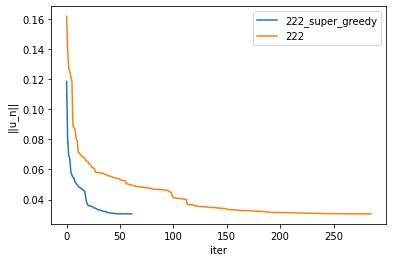

In [35]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots() 
ax.plot(v_norm_222[1:], label="222_super_greedy")
ax.plot(prev_norm_222[1:], label="222")
ax.set_xlabel('iter')
ax.set_ylabel('||u_n||')
ax.legend()

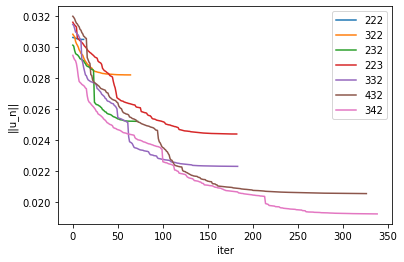

In [37]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots() 
ax.plot(v_norm_222[50:], label="222")
ax.plot(v_norm_322[50:], label="322")
ax.plot(v_norm_232[50:], label="232")
ax.plot(v_norm_223[50:], label="223")
ax.plot(v_norm_332[50:], label="332")
ax.plot(v_norm_432[50:], label="432")
ax.plot(v_norm_342[50:], label="342")

ax.set_xlabel('iter')
ax.set_ylabel('||u_n||')
ax.legend()

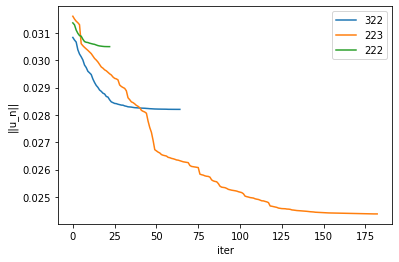

In [47]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots() 
ax.plot(v_norm_322[50:], label="322")
ax.plot(v_norm_223[50:], label="223")
ax.plot(v_norm_222[40:], label="222")


ax.set_xlabel('iter')
ax.set_ylabel('||u_n||')
ax.legend()

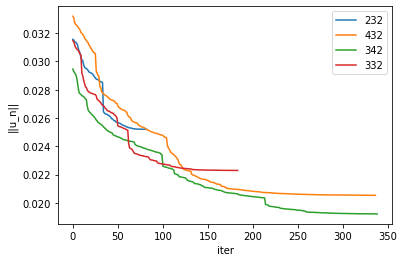

In [48]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots() 
ax.plot(v_norm_232[40:], label="232")
ax.plot(v_norm_432[40:], label="432")
ax.plot(v_norm_342[50:], label="342")
ax.plot(v_norm_332[50:], label="332")

ax.set_xlabel('iter')
ax.set_ylabel('||u_n||')
ax.legend()

In [43]:
approximate_without_saving(x, y, 2, 3, 2)

0.08680937413386575
0.06715948844982138
0.05898939155018252
0.05546327037220657
0.053075942359892665
0.0483665759310139
0.04494991261492366
0.04310659355135912
0.03994024468868148
0.038969053266377784
0.03800970312114885
0.03762841508665947
0.03725448813305996
0.036693451104643796
0.03513111708580375
0.034765111345636986
0.03409153017458028
0.03383215092710087
0.031723572847535055
0.031562627166612026
0.03141084082632807
0.0313086413466158
0.03095144584983409
0.030603019717679265
0.03012668506501355
0.02978321989017865
0.029527431164238317
0.029443043305345633
0.029251614830239556
0.029196784057458593
0.02911053662616038
0.02893290056394651
0.028759502662549223
0.02871120589309245
0.028599522749444717
0.028547874681453707
0.026434555471214153
0.026291040590095332
0.026255220003941312
0.026177865818627702
0.026067124997186733
0.025929197568199617
0.025811237750692658
0.025711648166642
0.025663371007118928
0.025631418067050955
0.02554536725003722
0.02548521946103695
0.02542888077537556
0

[0.9999999999999937,
 0.11766626717931253,
 0.08680937413386575,
 0.07405766141295198,
 0.06715948844982138,
 0.0637078426149524,
 0.05898939155018252,
 0.057699185803038,
 0.05546327037220657,
 0.055036794010334775,
 0.053075942359892665,
 0.04942210232344877,
 0.0483665759310139,
 0.047046467881928136,
 0.04494991261492366,
 0.0437822929459734,
 0.04310659355135912,
 0.04046394806555422,
 0.03994024468868148,
 0.03954649565578516,
 0.038969053266377784,
 0.038316608756355244,
 0.03800970312114885,
 0.037809327208779935,
 0.03762841508665947,
 0.03742066305426897,
 0.03725448813305996,
 0.03698218130039998,
 0.036693451104643796,
 0.0354798958920269,
 0.03513111708580375,
 0.03491205000600182,
 0.034765111345636986,
 0.03447487573151713,
 0.03409153017458028,
 0.03394032892783088,
 0.03383215092710087,
 0.031821827252223676,
 0.031723572847535055,
 0.03160892121319731,
 0.031562627166612026,
 0.03151635649260778,
 0.03141084082632807,
 0.031352108423234784,
 0.0313086413466158,
 0.031